### Page 35-36: 3-1 solution:

**Exercise:** Something like the class size paradox appears if you survey children and ask how many children are in their family. Families with many children are more likely to appear in your sample, and families with no children have no chance to be in the sample.

Use the NSFG respondent variable `numkdhh` to construct the actual distribution for the number of children under 18 in the respondents' households.

Now compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

Plot the actual and biased distributions, and compute their means.

In [10]:
from __future__ import print_function, division

%matplotlib inline

import numpy as np

import nsfg
import first
import thinkstats2
import thinkplot

### construct the actual distribution for the number of children under 18 in the respondents' households.

I'll load the NSFG pregnancy file and select numkdhh for the number of children under 18 :  [codebook](https://www.icpsr.umich.edu/nsfg6/Controller?displayPage=labelDetails&fileCode=FEM&section=R&subSec=7868&srtLabel=606815)

In [12]:
resp = nsfg.ReadFemResp()
numchild = resp[resp.numkdhh <18] # to make sure we include only age under 18.

In [34]:
numchild.describe()

,caseid,rscrinf,rdormres,rostscrn,rscreenhisp,rscreenrace,age_a,age_r,cmbirth,agescrn,...,totincr_i,pubassis_i,basewgt,adj_mod_basewgt,finalwgt,secu_r,sest,cmintvw,cmlstyr,intvlngth
count,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000,7636.000000,7643.000000,7643.000000,7643.000000,7643.000000,...,7643.000000,7643.000000,7643.000000,7643.000000,7643.000000,7643.00000,7643.000000,7643.000000,7643.000000,7643.000000
mean,6272.107811,2.589952,4.901086,3.210258,4.207641,4.543740,29.501374,29.503729,872.764098,29.503729,...,0.082428,0.020411,4165.454807,5285.022176,8054.522410,1.48986,44.574905,1232.783200,1220.783200,82.755558
std,3638.824134,1.957642,0.621227,1.453237,1.594345,0.915728,8.431868,8.433187,101.161818,8.433187,...,0.275034,0.141410,3210.203026,4506.081386,7342.734883,0.49993,24.239897,2.978545,2.978545,32.618328
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.000000,15.000000,688.000000,15.000000,...,0.000000,0.000000,64.577101,71.201194,118.656790,1.00000,1.000000,1225.000000,1213.000000,13.512667
25%,3105.500000,1.000000,5.000000,2.000000,5.000000,4.000000,22.000000,22.000000,787.000000,22.000000,...,0.000000,0.000000,2418.149898,2900.050198,4175.880599,1.00000,25.000000,1231.000000,1219.000000,60.527833
50%,6275.000000,1.000000,5.000000,3.000000,5.000000,5.000000,30.000000,30.000000,873.000000,30.000000,...,0.000000,0.000000,3410.500996,4212.069520,6553.169964,1.00000,45.000000,1233.000000,1221.000000,78.180833
75%,9442.000000,5.000000,5.000000,4.000000,5.000000,5.000000,37.000000,37.000000,959.500000,37.000000,...,0.000000,0.000000,4870.774756,6033.357685,9590.027246,2.00000,65.000000,1235.000000,1223.000000,99.281000
max,12571.000000,5.000000,5.000000,8.000000,5.000000,5.000000,44.000000,44.000000,1058.000000,44.000000,...,1.000000,1.000000,99707.832014,157143.686687,261879.953864,2.00000,84.000000,1239.000000,1227.000000,306.238000


Here's the histogram of numchild:

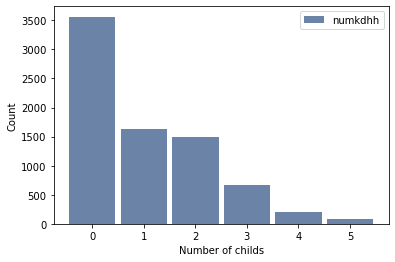

In [18]:
hist = thinkstats2.Hist(numchild.numkdhh, label='numkdhh')
thinkplot.Hist(hist)
thinkplot.Config(xlabel='Number of childs', ylabel='Count')

To normalize the distribution, we could divide through by the total count:

In [19]:
n = hist.Total()
pmf = hist.Copy()
for x, freq in hist.Items():
    pmf[x] = freq / n

The result is a Probability Mass Function (PMF).

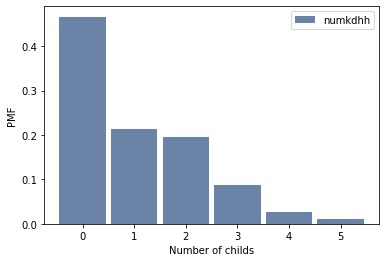

In [20]:
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Number of childs', ylabel='PMF')

the actual distribution for the number of children under 18 in the respondents' households

we can also use the thinkstats2.Pmf to get the same result.

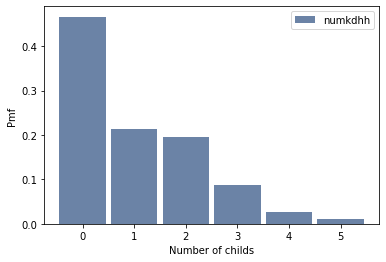

In [22]:
pmf = thinkstats2.Pmf(numchild.numkdhh, label='numkdhh')
thinkplot.Hist(pmf)
thinkplot.Config(xlabel='Number of childs', ylabel='Pmf')

### compute the biased distribution we would see if we surveyed the children and asked them how many children under 18 (including themselves) are in their household.

This function computes the biased PMF we would get if we surveyed children and asked them how many children under 18.

In [23]:
def BiasPmf(pmf, label):
    new_pmf = pmf.Copy(label=label)

    for x, p in pmf.Items():
        new_pmf.Mult(x, x)
        
    new_pmf.Normalize()
    return new_pmf

The following graph shows the difference between the actual and observed distributions.

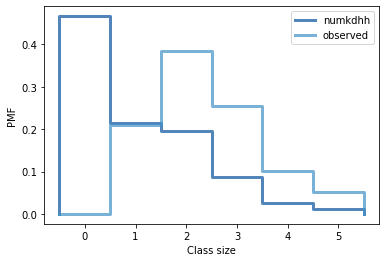

In [24]:
biased_pmf = BiasPmf(pmf, label='observed')
thinkplot.PrePlot(2)
thinkplot.Pmfs([pmf, biased_pmf])
thinkplot.Config(xlabel='Class size', ylabel='PMF')

The observed mean is substantially higher than the actual.

In [25]:
print('Actual mean', pmf.Mean())
print('Observed mean', biased_pmf.Mean())

Actual mean 1.024205155043831
Observed mean 2.403679100664282
